In [1]:
from pathlib import Path

from rljax.algorithm import DQN
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'SH_SDS_data.csv'))
data = raw.process()

In [3]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [4]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0
DAYS = 1
DAY = 2340

env = Env(data, no_trade_period=5, fixed_buy_cost=0.0015, fixed_sell_cost=0.0015, steps=DAY*DAYS, reward_func=return_rewards)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-3,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=1000,
    seed=SEED,
)
trainer.train()

Num steps: 1000     Return: -1.1    Time: 0:01:02
Num steps: 2000     Return: 28.1    Time: 0:02:03
Num steps: 3000     Return: 14.1    Time: 0:02:58
Num steps: 4000     Return: 11.6    Time: 0:03:48
Num steps: 5000     Return: 14.2    Time: 0:04:41
Num steps: 6000     Return: 34.9    Time: 0:05:38
Num steps: 7000     Return: 37.5    Time: 0:06:28
Num steps: 8000     Return: 30.9    Time: 0:07:21
Num steps: 9000     Return: 0.1     Time: 0:08:22
Num steps: 10000    Return: 25.8    Time: 0:09:18


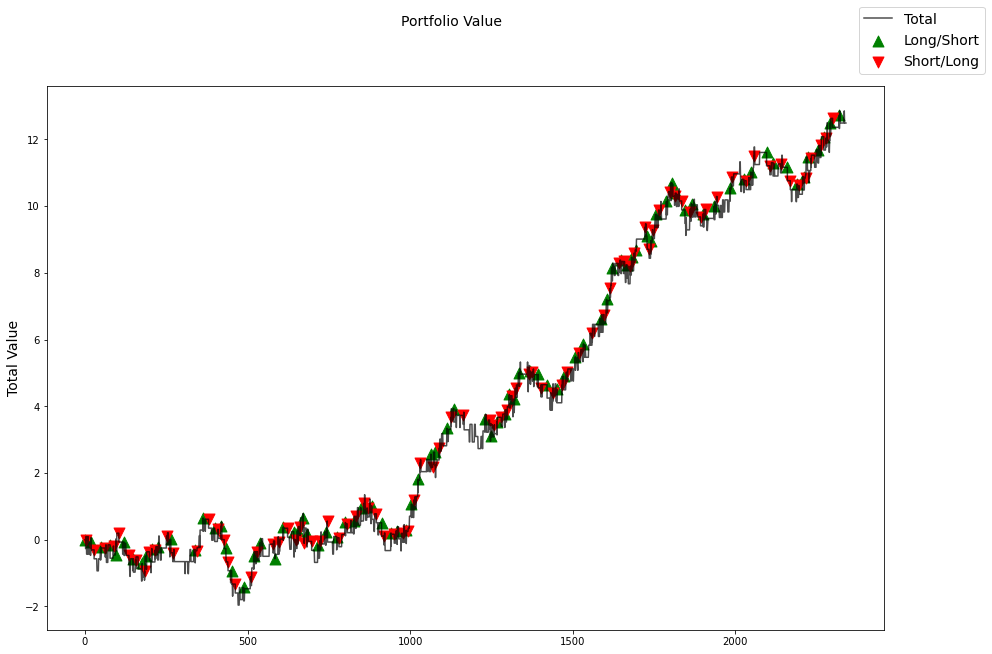

In [5]:
env.plot()

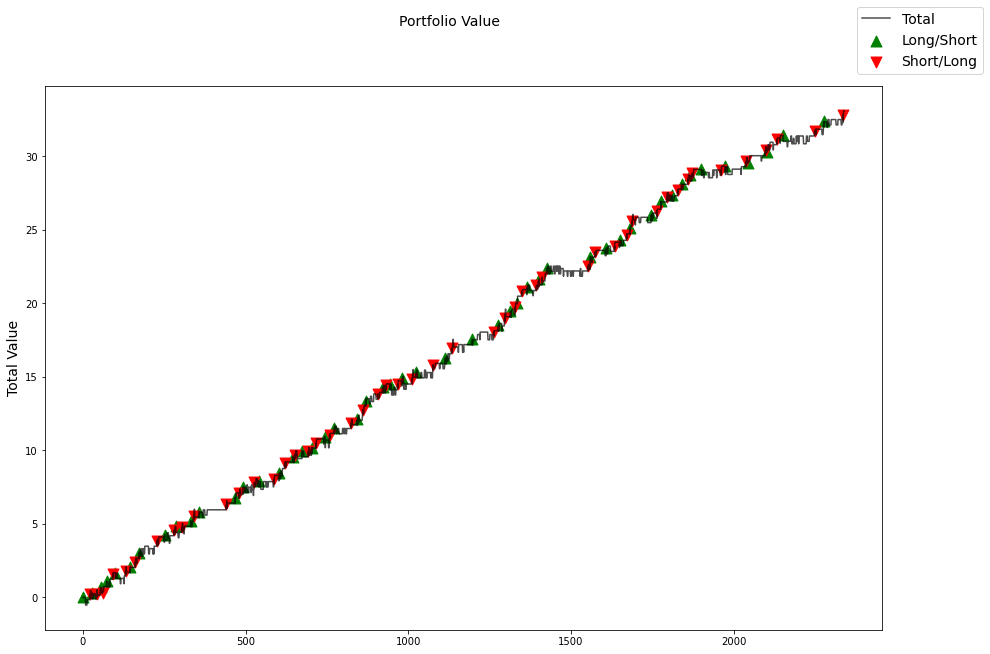

In [6]:
env_test.plot()

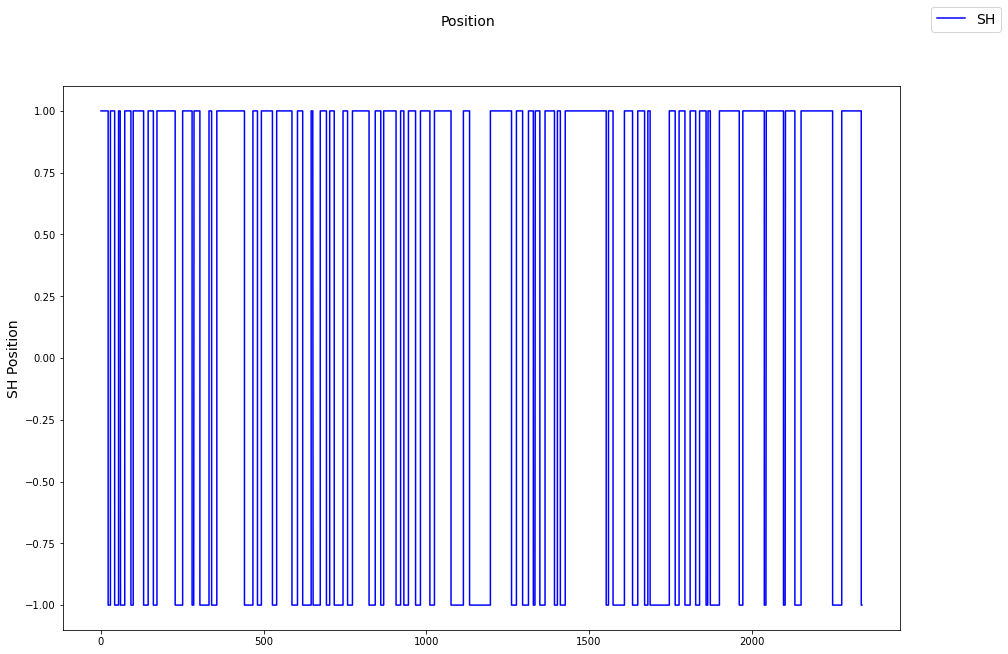

In [7]:
env_test.plot('position_history')

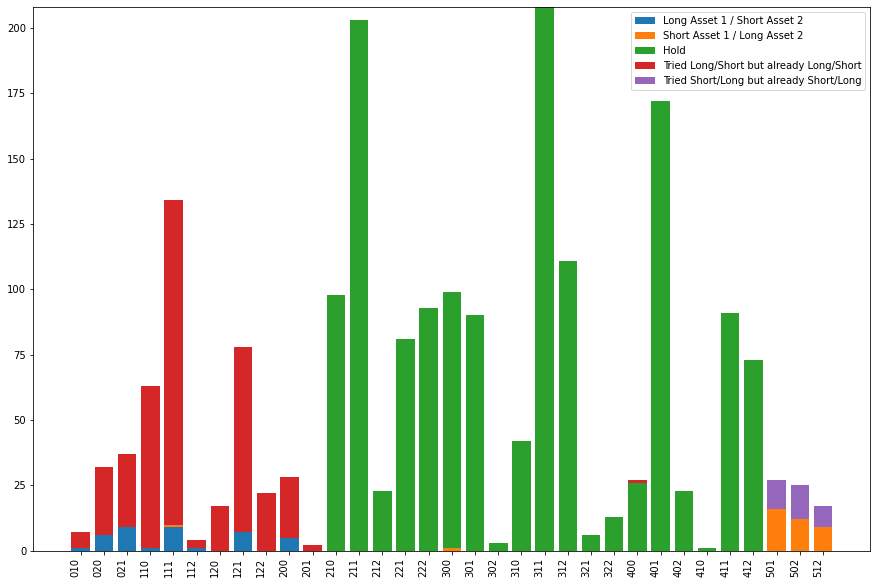

In [8]:
env_test.summarize_decisions()